<a href="https://colab.research.google.com/github/augustocaio95/Data_Warehouse_Lake_BI/blob/main/Data_warehouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#PARTE 1

#Criação dos dados
num_produtos = 600
produtos = {
    'produto_id': range(1, num_produtos +1),
    'nome': [f'Produto{i}' for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Electrônicos', 'Roupas', 'Alimentos', num_produtos])
}

#Criação do data frame produtos
df_produtos = pd.DataFrame(produtos)

#Criação de dados simulados das datas das vendas
num_vendas = 1000 #
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-01', periods=30), num_vendas), #
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),
    'quantidade': np.random.randint(50, 200, num_vendas), #
    'valor_total': np.random.randint(1000, 10000, num_vendas) #
}

#Criação do data frame das datas das vendas
df_vendas = pd.DataFrame(data_vendas)

#Salva os dados dos dataframes de vendas e produtos em arquivos csv
df_vendas.to_csv('vendas.csv', index=False)
df_produtos.to_csv('produtos.csv', index=False)

#Leitura dos arquivos
df_vendas = pd.read_csv('vendas.csv')
df_produtos = pd.read_csv('produtos.csv')

#Junção das vendas e produtos pelo id
df_merge = pd.merge(df_vendas, df_produtos, on='produto_id', how='inner')

#Salva o dataframe da junção no arquivo csv
df_merge.to_csv('data_warehouse.csv', index=False)

#Faz a leitura do arquivo
df_warehouse = pd.read_csv('data_warehouse.csv')
print("Contéudo do Data Warehouse:")
print(df_warehouse)

Contéudo do Data Warehouse:
           data  produto_id  quantidade  valor_total        nome     categoria
0    2024-04-07         555         172         7932  Produto555  Electrônicos
1    2024-04-13         349         196         6397  Produto349  Electrônicos
2    2024-04-11         349         172         1259  Produto349  Electrônicos
3    2024-04-05         349          86         6657  Produto349  Electrônicos
4    2024-04-14         349          62         2131  Produto349  Electrônicos
..          ...         ...         ...          ...         ...           ...
995  2024-04-01          94          80         8286   Produto94  Electrônicos
996  2024-04-23         276         192         9852  Produto276  Electrônicos
997  2024-04-05         285          73         4250  Produto285  Electrônicos
998  2024-04-30         285         111         5595  Produto285  Electrônicos
999  2024-04-11         427         130         2691  Produto427  Electrônicos

[1000 rows x 6 columns]

Análise de vendas por produto:
            quantidade  valor_total
nome                               
Produto1            67         2118
Produto10          146         2806
Produto100         135         4444
Produto101         550        28582
Produto102          98         5775
...                ...          ...
Produto95          207        12623
Produto96          544        21522
Produto97          330        15057
Produto98           85         2903
Produto99          147         5559

[482 rows x 2 columns]

Análise de vendas por taegoria de produto:
              quantidade  valor_total
categoria                            
Electrônicos      123661      5472121

Análise de tendências temporais:
            quantidade  valor_total
data                               
2024-04-01        4102       189244
2024-04-02        5206       212367
2024-04-03        3619       150602
2024-04-04        4349       168519
2024-04-05        3094       132453
2024-04-06        3275       1875

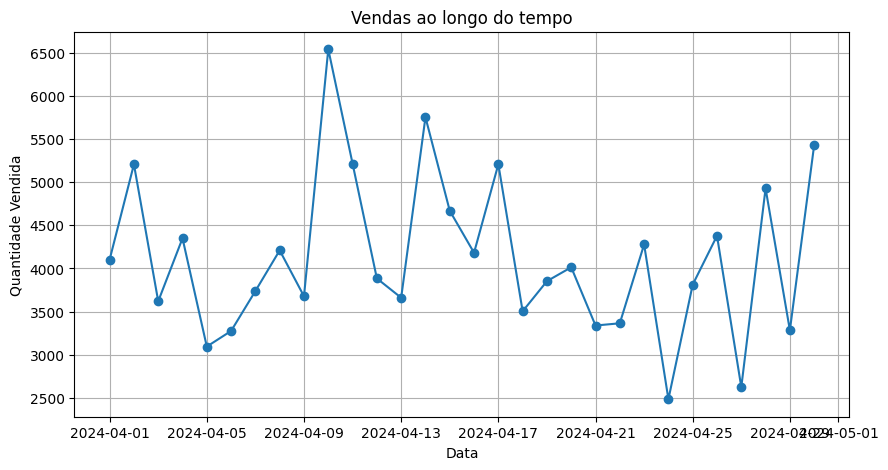


Análise de desempenho de produtos:
nome
Produto1       2118
Produto10      2806
Produto100     4444
Produto101    28582
Produto102     5775
              ...  
Produto95     12623
Produto96     21522
Produto97     15057
Produto98      2903
Produto99      5559
Name: valor_total, Length: 482, dtype: int64


In [ ]:
#PARTE 2
import pandas as pd
import matplotlib.pyplot as plt

#Faz leitura e armazenamento do arquivo csv
df_warehouse = pd.read_csv('data_warehouse.csv')

#Agrupa os dados por nome e produto, soma a quantidade e valor total das vendas
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade', 'valor_total']].sum()
print("Análise de vendas por produto:")
print(vendas_por_produto)

#Agrupa os dados por categoria e soma a quantidade e valor total das vendas
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade', 'valor_total']].sum()
print("\nAnálise de vendas por taegoria de produto:")
print(vendas_por_categoria)

#Agrupa os dados por data, somando a quantidade e valor total das vendas
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()
print("\nAnálise de tendências temporais:")
print(vendas_por_data)

#Mostra um grafico das vendas ao longo do tempo
plt.figure(figsize=(10,5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o', linestyle='-')
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

#Mostra o desempenho de cada produto, soma o valor total de vendas
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\nAnálise de desempenho de produtos:")
print(desempenho_produto)

Análise de vendas por produto:
            quantidade  valor_total
nome                               
Produto1           386        15312
Produto10          248        12631
Produto100         130         4951
Produto101         178         4115
Produto102         104         3783
...                ...          ...
Produto95          625        40902
Produto96          289        10250
Produto97          147         7401
Produto98          212        15944
Produto99          248        10625

[486 rows x 2 columns]

Análise de vedas por categoria de produto:
           quantidade  valor_total
categoria                         
Alimentos      125362      5465725

Análise de tedências temporais:
            quantidade  valor_total
data                               
2024-04-01        5360       248392
2024-04-02        5170       223573
2024-04-03        3045       136066
2024-04-04        3519       165771
2024-04-05        4880       215338
2024-04-06        4259       157916
2024-04

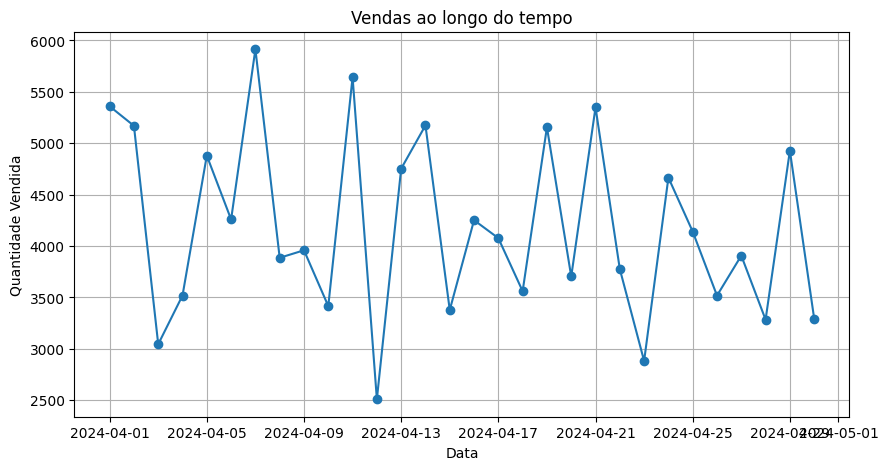


Análise de desempenho de produtos:
nome
Produto1      15312
Produto10     12631
Produto100     4951
Produto101     4115
Produto102     3783
              ...  
Produto95     40902
Produto96     10250
Produto97      7401
Produto98     15944
Produto99     10625
Name: valor_total, Length: 486, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Faz a leitura e armazenamento do arquivo csv
df_warehouse = pd.read_csv('data_warehouse.csv')

#Agrupa os dados por nome do produto, somando a quantidade e o valor total das vendas
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade', 'valor_total']].sum()
print("Análise de vendas por produto:")
print(vendas_por_produto)

#Agrupa os dados por categoria de produto, somando a quantidade e o valor total das vendas
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade', 'valor_total']].sum()
print("\nAnálise de vedas por categoria de produto:")
print(vendas_por_categoria)

#Converte a coluna 'data' para o tipo datetime
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()
print("\nAnálise de tedências temporais:")
print(vendas_por_data)

#Mostra um gráfico  das vendas ao longo do tempo
plt.figure (figsize=(10, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o',linestyle='-')
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

#Faz o calculo do desempenho de cada produto e soma o valor total das vendas
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\nAnálise de desempenho de produtos:")
print(desempenho_produto)

In [ ]:
import pandas as pd
import numpy as np
import os

#Criação do data lake sobre a condição de que ele não exista
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')

#Define o numero de arquivos e numer de linhas por arquivo
num_files = 10
num_rows_per_file = 1000

#Criação da lista para armazenar os dataframes
dfs = []

#Loop de geração de arquivos
for i in range (num_files):
    #Gera dados aleatórios para as colunas
    data ={
        'coluna1' : np.random.randint(0, 100, num_rows_per_file),
        'coluna2' : np.random.randn(num_rows_per_file),
        'coluna3' : np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }

    #Cria um dataframe
    df = pd.DataFrame(data)

    #Cria o nome do arquivo
    file_name = f'data_lake/dados_{i+1}.csv'
    df.to_csv(file_name, index=False)

    #Adciona o dataframe a lista de df's
    dfs.append((file_name, df))

print("Dados do data Lake gerados com sucesso!")

#Imprime os dados dos arquivos
for file_name, df in dfs:
    print (f"\nDados do arquivo: {file_name}\n")
    print(df.head())


Dados do data Lake gerados com sucesso!

Dados do arquivo: data_lake/dados_1.csv

   coluna1   coluna2 coluna3
0       70  1.156105       C
1       21 -1.146422       A
2       63 -0.153977       A
3        4  1.377052       A
4       41  1.050551       B

Dados do arquivo: data_lake/dados_2.csv

   coluna1   coluna2 coluna3
0       57  0.403547       A
1       27  1.275723       B
2        9  0.222809       C
3       44 -0.369044       A
4       99  1.050255       C

Dados do arquivo: data_lake/dados_3.csv

   coluna1   coluna2 coluna3
0       70 -0.397924       C
1       32  0.459643       C
2       38 -0.767943       A
3       92 -1.257005       C
4       23  0.141229       B

Dados do arquivo: data_lake/dados_4.csv

   coluna1   coluna2 coluna3
0       45 -1.745630       B
1       42 -1.826954       A
2        2  0.202635       C
3       74 -0.190850       A
4        6  0.960684       B

Dados do arquivo: data_lake/dados_5.csv

   coluna1   coluna2 coluna3
0       55  1.166347     

In [ ]:
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine

#Criação do data lake sobre a condição de que ele não exista
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')

#Define o numero de arquivos e numer de linhas por arquivo
num_files = 10
num_rows_per_file = 1000

#Criação da lista para armazenar os dataframes
dfs = []

#Loop de geração de arquivos
for i in range (num_files):
    #Gera dados aleatórios para as colunas
    data = {
        'coluna1': np.random.randint(0, 100, num_rows_per_file),
        'coluna2': np.random.randn(num_rows_per_file),
        'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }

    #Cria um dataframe
    df = pd.DataFrame(data)

    #Cria o nome do arquivo
    file_name = f'data_lake/dados_{i+1}.csv'
    df.to_csv(file_name, index = False)

    #Adciona o dataframe a lista de df's
    dfs.append(df)

print("Dados do data lake gerados com sucesso!")


#define a conexão do banco de dados SQL
conn_string = 'sqlite:///data_lake.db'

#Objeto responsavel pela conexão com banco de dados
engine = create_engine(conn_string)

#Loop para salvar os DataFrames como tabelas no banco de dados SQLite
for i, df in enumerate (dfs, 1):
    table_name = f'dados_{i}'
    df.to_sql(table_name, engine, index=False)


Dados do data lake gerados com sucesso!


Primeiras linhas do DataFrame:
   coluna1   coluna2 coluna3
0       75 -0.602771       A
1       70 -0.082629       A
2       76  0.518456       C
3       65 -1.108617       B
4       86  1.211304       A

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

Resumo estatístico do DataFrame:
           coluna1      coluna2
count  1000.000000  1000.000000
mean     50.247000    -0.036673
std      29.545066     1.022011
min       0.000000    -3.771402
25%      24.000000    -0.709318
50%      52.000000    -0.043729
75%      76.000000     0.664109
max      99.000000     3.300497


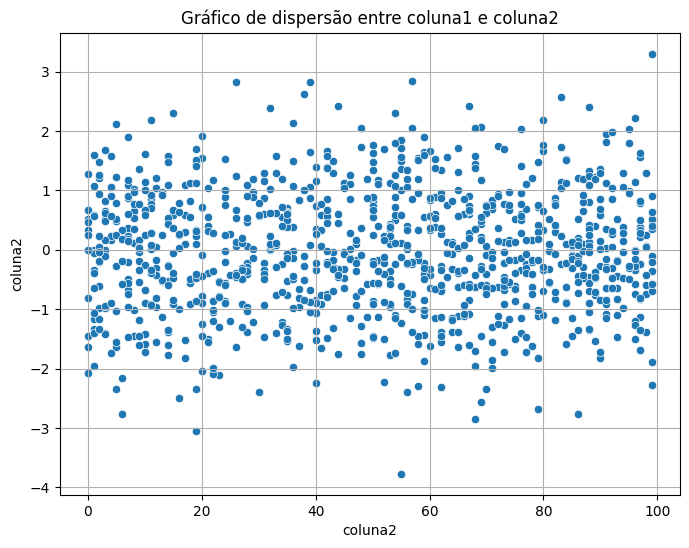

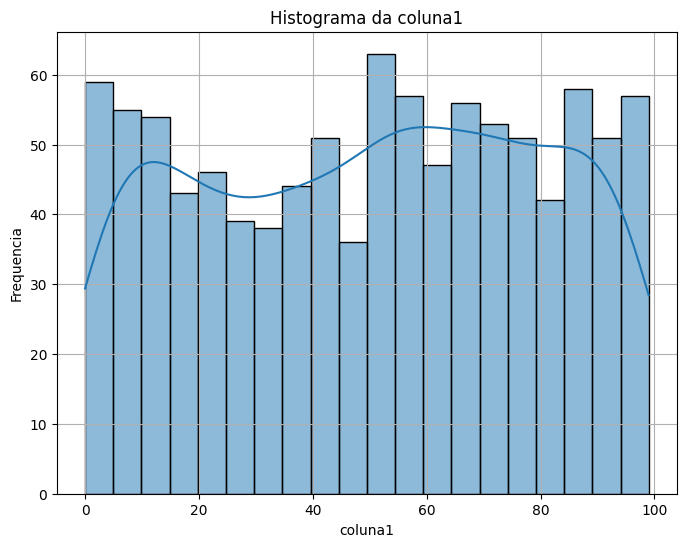

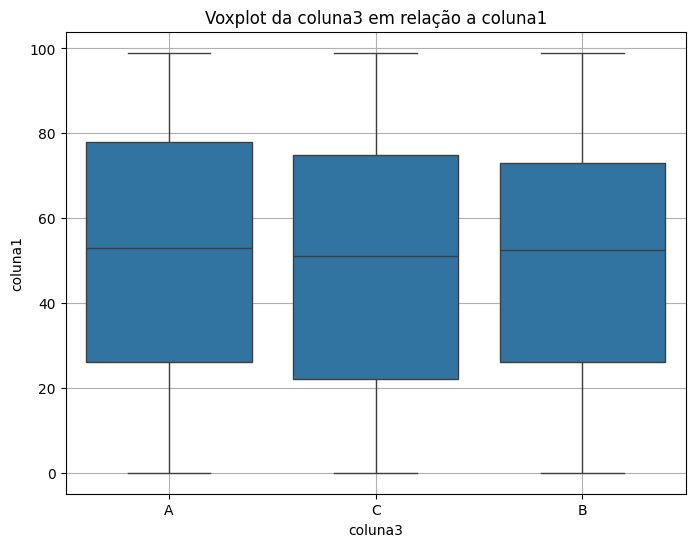

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

#define a conexão do banco de dados SQL e o objeto responsavel pela conexão
conn_string = 'sqlite:///data_lake.db'
engine = create_engine(conn_string)

#Criação da tabela a ser consultada e sua leitura
table_name = 'dados_1' #
df = pd.read_sql_table(table_name, engine)

#Imprime as primeiras linhas do dataframe
print("Primeiras linhas do DataFrame:")
print(df.head())

#Imprime as informações do dataframe
print("\nInformações sobre o DataFrame:")
print(df.info())

#Imprime de um resumo estatístico do DataFrame
print("\nResumo estatístico do DataFrame:")
print(df.describe())

#
#Gera o gráfico de dispersão entre a coluna 1 e coluna 2
plt.figure(figsize=(8,6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title('Gráfico de dispersão entre coluna1 e coluna2')
plt.xlabel('coluna1')
plt.xlabel('coluna2')
plt.grid(True)
plt.show

#Gera o histograma da coluna 1
plt.figure(figsize=(8,6))
sns.histplot(df['coluna1'], bins = 20, kde = True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('Frequencia')
plt.grid(True)
plt.show

#Gera o Boxplot da coluna3 em relação à coluna1
plt.figure(figsize=(8,6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title('Voxplot da coluna3 em relação a coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()